In [7]:
import pandas as pd #import pandas library
import seaborn as sns #import seaborn library used for data visualization and plotting
import matplotlib.pyplot as plt #import matplotlib library that seaborn builds on for plotting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #import train_test_split function from sklearn library to split data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score #import mean_squared_error and r2_score from sklearn library to evaluate the model performance

In [8]:
df = pd.read_csv("/Users/rithwik.chandrasekaran/AmesHousingMarket/AmesHousing.csv") #read the csv file into a pandas dataframe

In [9]:
df.isnull().sum().sort_values(ascending=False).head(20) #this will print the top 20 columns with the most null values
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median()) #fill missing values in Lot Frontage with median

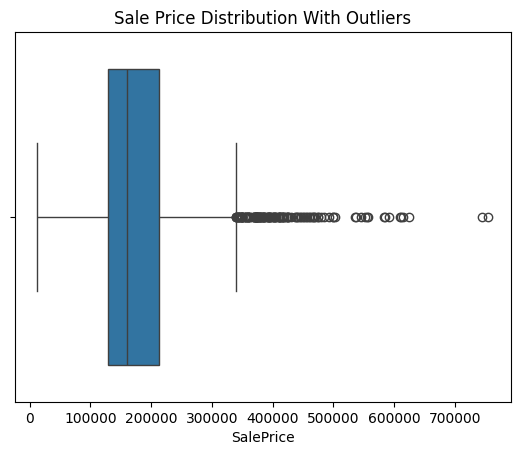

In [10]:
sns.boxplot(x=df['SalePrice']) # boxplot of Sale Price
plt.title('Sale Price Distribution With Outliers') #title for the plot
plt.show() #displays the boxplot of Sale Price by Overall Quality

In [11]:
numeric_cols = df.select_dtypes(include='number').columns # selects only numeric columns from df
for col in numeric_cols: # iterates through each column in numeric_cols
    Q1 = df[col].quantile(0.25) # calculates the first quartile of column
    Q3 = df[col].quantile(0.75) # calculates the third quartile of column
    IQR = Q3 - Q1 # calculates IQR
    lower_bound = Q1 - 1.5 * IQR # calculates lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR # calculates upper bound for outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #filters outliers from columns

In [12]:
num_cols = len(numeric_cols) 
num_rows = (num_cols + 2) // 3 # calculates number of rows needed for subplots, 3 columns per row
plt.figure(figsize=(16, 5 * num_rows)) # 5 in tall per row 

<Figure size 1600x6500 with 0 Axes>

<Figure size 1600x6500 with 0 Axes>

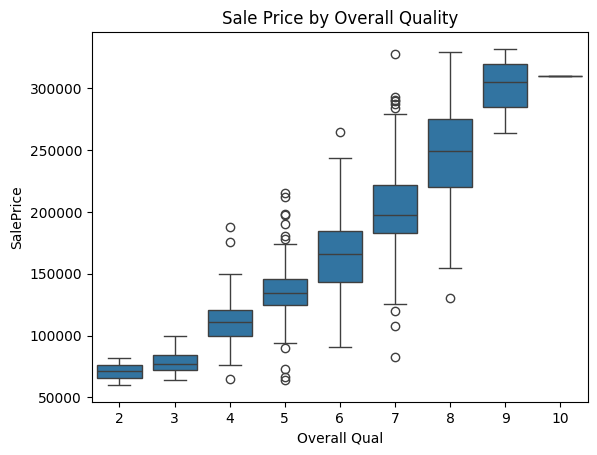

In [13]:
sns.boxplot(x='Overall Qual', y='SalePrice', data=df) #data = df ensures it reads df for dataframe
plt.title('Sale Price by Overall Quality')
plt.show() #displays the boxplot of Sale Price by Overall Quality

/var/folders/7s/wbcwd4sn44979x3sjw34sp940000gn/T/ipykernel_31850/3044456574.py:7: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout() #adjusts layout to prevent overlap


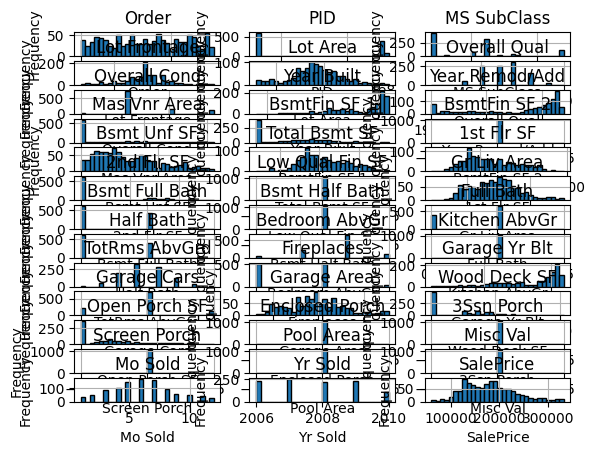

In [14]:
for i, col in enumerate(numeric_cols, 1): #enumerate means it will give us the index and the column name
    plt.subplot(num_rows, 3, i) #creates a subplot for each numeric column (3 columns)
    df[col].hist(bins=30, edgecolor='black') #histogram for each column, 30 bars
    plt.title(col) #title for each subplot, based on column name
    plt.xlabel(col)
    plt.ylabel('Frequency') 
plt.tight_layout() #adjusts layout to prevent overlap
plt.show()